The fast moving consumer goods (FMCG) buniness data set I am using contains information of about 2000 people from a giving area patronizing the business in question. The information in the data summarizes the description of the kind of customers entering a physical FMCG store and all data has been collected through the 'loyalty card' they used. By the end of this note book you will discover that I have been able to apply the KMeans++ algorithm and Principal Component Analysis to detect similar qualities among the different customers and separated the customers into different 'social groups' (which I have refered to here as segments or clusters)

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
df_seg = pd.read_csv('segmentation data.csv')

In [3]:
df_seg

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
df_seg = pd.read_csv('segmentation data.csv', index_col = 0)
df_seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
df_seg.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df_seg.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'My heat Map')

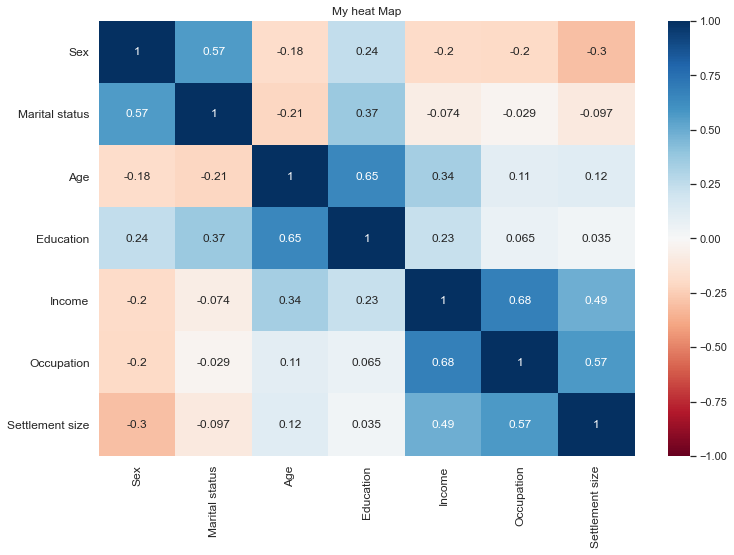

In [134]:
plt.figure(figsize = (12, 8))
s = sns.heatmap(df_seg.corr(),
                cmap = 'RdBu',
                vmin = -1, vmax = 1,
                annot = True)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize= 12)
s.set_xticklabels(s.get_yticklabels(), rotation= 90, fontsize = 12)
s.set_title('My heat Map')

Text(0, 0.5, 'INCOME')

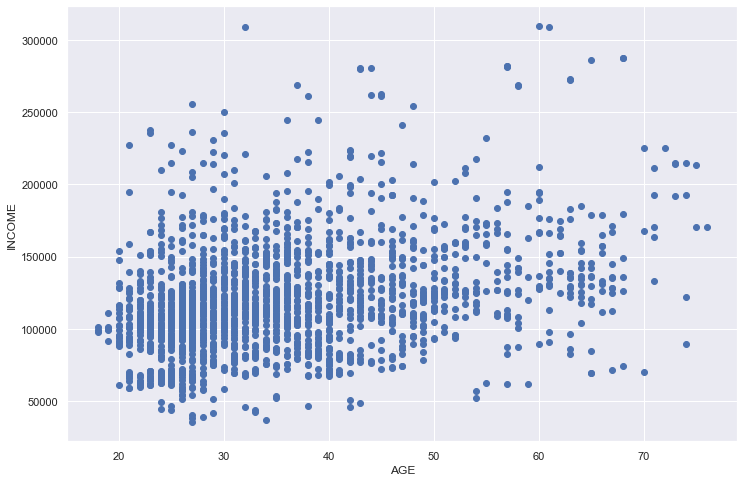

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(df_seg.iloc[:,2], df_seg.iloc[:,4])
plt.xlabel('AGE')
plt.ylabel('INCOME')

**STANDARDIZATION**


In [8]:
myscaler = StandardScaler()
seg_std = myscaler.fit_transform(df_seg)

In [9]:
seg_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [139]:
seg_std.shape

(2000, 7)

**HIERACHICAL CLUSTERING, DENDROGRAM AND LINKAGE**

In [140]:
hier_clust = linkage(seg_std, method = 'ward')

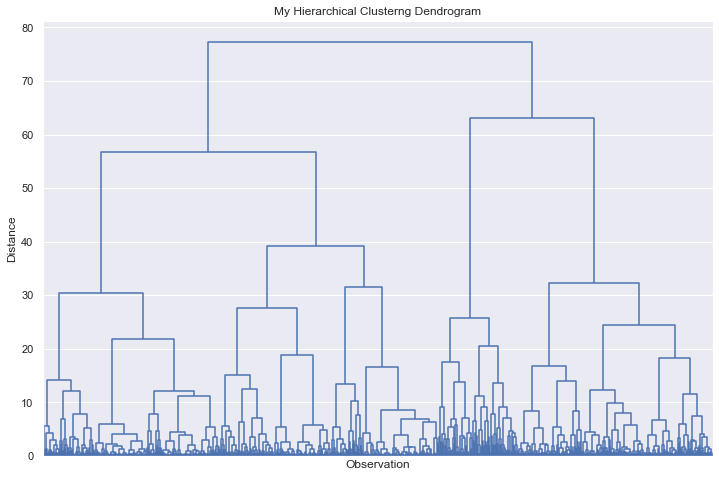

In [141]:
plt.figure(figsize = (12,8))
plt.title('My Hierarchical Clusterng Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')

dendrogram(hier_clust,
           show_leaf_counts = False,
          no_labels = True,
          color_threshold = 0)
plt.show()





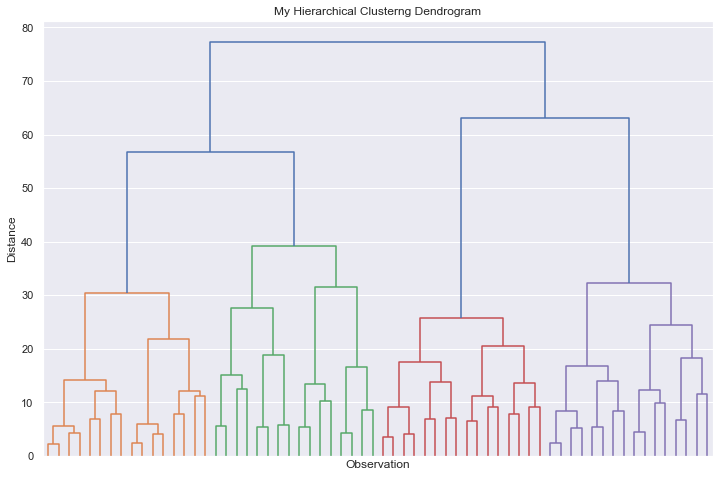

In [143]:
plt.figure(figsize = (12,8))
plt.title('My Hierarchical Clusterng Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')

dendrogram(hier_clust, 
           truncate_mode ='level',
           p = 5,
           show_leaf_counts = False,
          no_labels = True)
plt.show()

**K-MEANS CLUSTERING**

In [144]:
wcss = []
for i in range(1, 11):
    my_KMeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    my_KMeans.fit(seg_std)
    wcss.append(my_KMeans.inertia_)

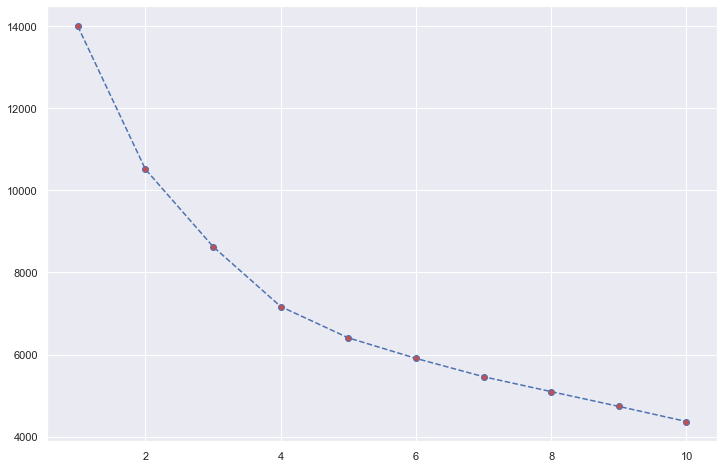

In [145]:
plt.figure(figsize = (12,8))
plt.plot(range(1,11), wcss, linestyle = '--', marker = 'o', markerfacecolor = 'r')

In [146]:
my_KMeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 50)


In [147]:
my_KMeans.fit(seg_std)

KMeans(n_clusters=4, random_state=50)

**LETS ANALYSE THE RESULT**

In [148]:
df_seg_KMeans = df_seg.copy()
df_seg_KMeans['theKMeansClusters'] = my_KMeans.labels_

In [149]:
df_seg_Analysis = df_seg_KMeans.groupby(['theKMeansClusters']).mean()
df_seg_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
theKMeansClusters,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [150]:
df_seg_KMeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,theKMeansClusters
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,1
100000005,0,0,53,1,149031,1,1,1


In [151]:
df_seg_KMeans[['theKMeansClusters', 'Sex']].head()

,theKMeansClusters,Sex
ID,,
100000001,3,0
100000002,2,1
100000003,0,0
100000004,1,0
100000005,1,0


**CLUSTER SIZE OR NUMBER OF PEOPLE IN EACH CLUSTER/SEGMENTS**

In [152]:
df_seg_Analysis['N_observations'] = df_seg_KMeans[['theKMeansClusters', 'Sex']].groupby('theKMeansClusters').count()

#for the abobe code, before the '.groupby' statement we included a second arguement(column), to help us count each row
#in the resulting table after grouping by 'theKMeansClusters'. And you can choose any column for this, we just decided to use
#the column 'sex' here

df_seg_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_observations
theKMeansClusters,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263


**PROPORTION OF EACH CLUSTER SIZE COMPARED TO THE TOTAL NUMBER OF CUSTOMERS**

In [153]:
df_seg_Analysis['ClusterProportion'] = df_seg_Analysis['N_observations']/df_seg_Analysis['N_observations'].sum()
df_seg_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_observations,ClusterProportion
theKMeansClusters,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [154]:
df_seg_Analysis.rename({
                        0:'Fewer opportunitiies People',
                        1:'Career focused People',
                        2:'Standard or Average People',
                        3:'Well Off People'
                        
                       })

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_observations,ClusterProportion
theKMeansClusters,,,,,,,,,
Fewer opportunitiies People,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Career focused People,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Standard or Average People,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Well Off People,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [155]:
df_seg_KMeans['Label'] = df_seg_KMeans['theKMeansClusters'].map({
                        0:'Fewer opportunitiies People',
                        1:'Career focused People',
                        2:'Standard or Average People',
                        3:'Well Off People'
                        
                       })

In [156]:
df_seg_KMeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,theKMeansClusters,Label
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,3,Well Off People
100000002,1,1,22,1,150773,1,2,2,Standard or Average People
100000003,0,0,49,1,89210,0,0,0,Fewer opportunitiies People
100000004,0,0,45,1,171565,1,1,1,Career focused People
100000005,0,0,53,1,149031,1,1,1,Career focused People
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0,Fewer opportunitiies People
100001997,1,1,27,1,117744,1,0,2,Standard or Average People
100001998,0,0,31,0,86400,0,0,0,Fewer opportunitiies People


C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


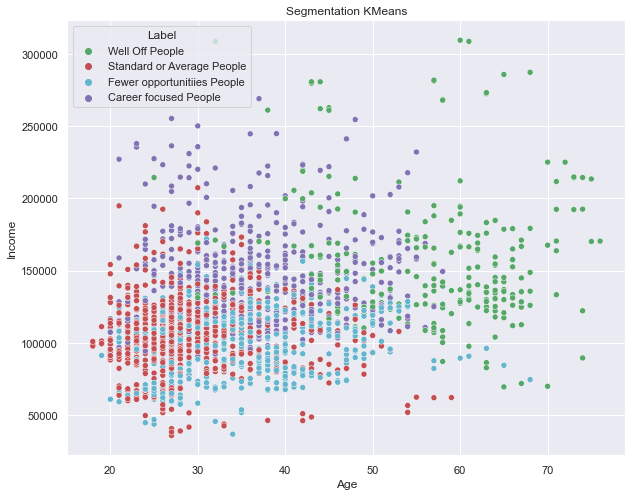

In [157]:
x_axis = df_seg_KMeans['Age']
y_axis = df_seg_KMeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_KMeans['Label'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation KMeans')
plt.show()

**Principal Component Analysis(PCA) With KMeans**

In [158]:
#We currently have seven components but we can reduce it to 3 or 4 components using PCA

**Making the choice of the number of components to use**

In [159]:
pca = PCA()

In [160]:
pca.fit(seg_std)

PCA()

In [161]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cummulative Explained Variance')

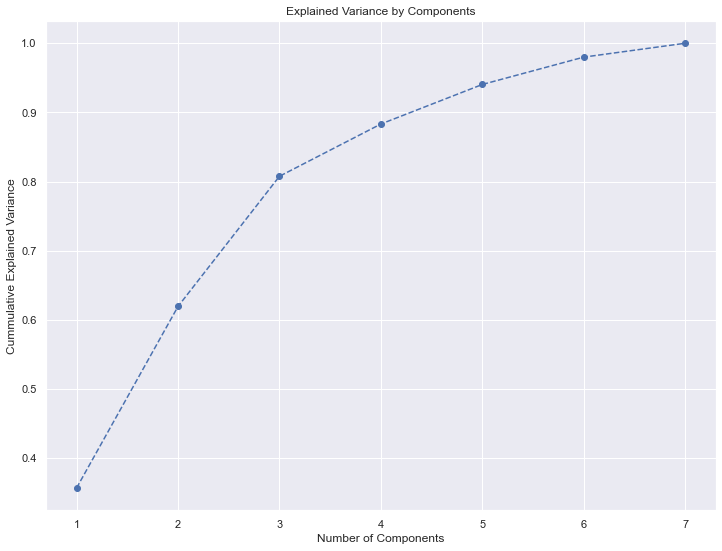

In [162]:
plt.figure(figsize = (12, 9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')

In [163]:
pca = PCA(n_components = 3)

In [164]:
pca.fit(seg_std)

PCA(n_components=3)

In [165]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [166]:
df_pca_comp = pd.DataFrame(pca.components_, 
                           columns = df_seg.columns.values, 
                           index = ['Component 1', 'Component 2', 'Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x256e2b47610>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

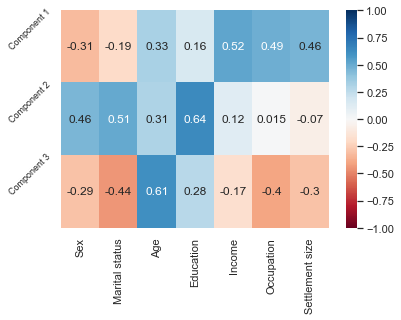

In [167]:
sns.heatmap(df_pca_comp, vmax = 1, vmin = -1, cmap = 'RdBu', annot = True)
plt.yticks([0,1,2],['Component 1', 'Component 2', 'Component 3'], rotation = 45, fontsize = 9)


In [168]:
pca.transform(seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [169]:
scores_pca = pca.transform(seg_std)

**KMeans Clustering with PCA**

In [170]:
wcss = []
for i in range(1, 11):
    my_KMeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    my_KMeans_pca.fit(scores_pca)
    wcss.append(my_KMeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

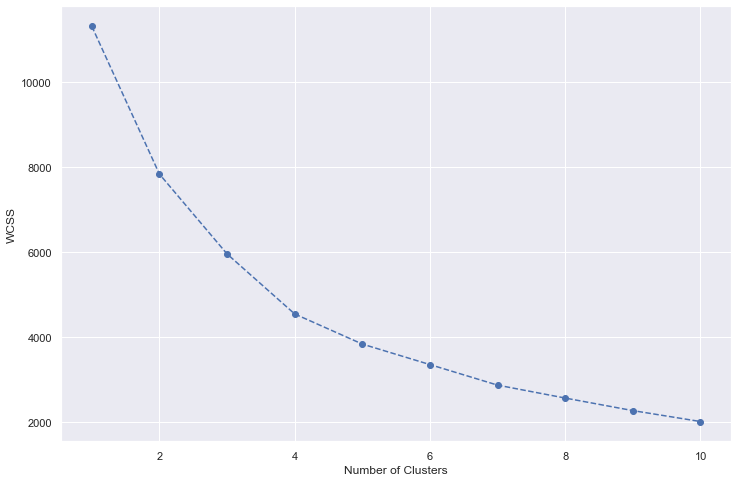

In [171]:
plt.figure(figsize = (12,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


In [172]:
my_KMeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 50)

In [173]:
my_KMeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=50)

**ANALYSIS OF THE KMEANS WITH PCA RESULT**

In [175]:
df_seg

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [179]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [180]:
pd.DataFrame(scores_pca)

,0,1,2
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


In [183]:
df_seg_KMeans_pca = pd.concat([df_seg.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_KMeans_pca.columns.values[-3:] = ('Component 1', 'Component 2', 'Component 3')
df_seg_KMeans_pca['theKMeansPCA_Clusters'] = my_KMeans_pca.labels_

In [184]:
df_seg_KMeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,theKMeansPCA_Clusters
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [192]:
df_seg_KMeans_pca_Analysis = df_seg_KMeans_pca.groupby(['theKMeansPCA_Clusters']).mean()
df_seg_KMeans_pca_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,No of Observations
theKMeansPCA_Clusters,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,692.0
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,265.0
2,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,583.0
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,460.0


In [193]:
df_seg_KMeans_pca_Analysis['No of Observations'] = df_seg_KMeans_pca[['theKMeansPCA_Clusters', 'Sex']].groupby(['theKMeansPCA_Clusters']).count()

In [196]:
df_seg_KMeans_pca_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,No of Observations
theKMeansPCA_Clusters,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583
2,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265


In [200]:
df_seg_KMeans_pca_Analysis['KMeansPCA_ClusterProportion'] = df_seg_KMeans_pca_Analysis['No of Observations']/df_seg_KMeans_pca_Analysis['No of Observations'].sum()
df_seg_KMeans_pca_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,No of Observations,KMeansPCA_ClusterProportion
theKMeansPCA_Clusters,,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [203]:
df_seg_KMeans_pca_Analysis = df_seg_KMeans_pca_Analysis.rename({
                        0:'Fewer opportunitiies People',
                        1:'Career focused People',
                        2:'Standard or Average People',
                        3:'Well Off People'
                        
                       })

In [204]:
df_seg_KMeans_pca_Analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,No of Observations,KMeansPCA_ClusterProportion
theKMeansPCA_Clusters,,,,,,,,,,,,
Fewer opportunitiies People,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Career focused People,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Standard or Average People,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Well Off People,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [206]:
df_seg_KMeans_pca['Label or Legend'] = df_seg_KMeans_pca['theKMeansPCA_Clusters'].map({
                        0:'Fewer opportunitiies People',
                        1:'Career focused People',
                        2:'Standard or Average People',
                        3:'Well Off People'
                        
                       })

In [208]:
df_seg_KMeans_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,theKMeansPCA_Clusters,No of Observations,Label or Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,460.0,Well Off People
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,583.0,Standard or Average People
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,692.0,Fewer opportunitiies People
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,265.0,Career focused People
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,NaN,Career focused People


C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The KMeans Clusters by PCA Components')

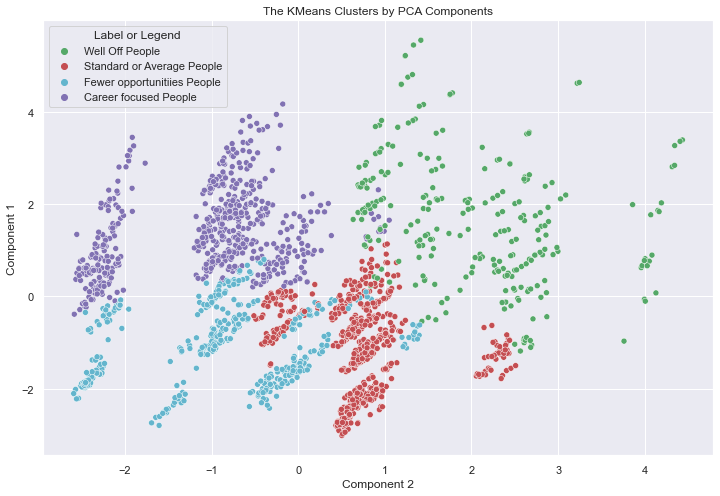

In [218]:
x_axis = df_seg_KMeans_pca['Component 2']
y_axis = df_seg_KMeans_pca['Component 1']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_KMeans_pca['Label or Legend'], palette = ['g', 'r', 'c', 'm'] )
plt.title('The KMeans Clusters by PCA Components')

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The KMeans Clusters by PCA Components')

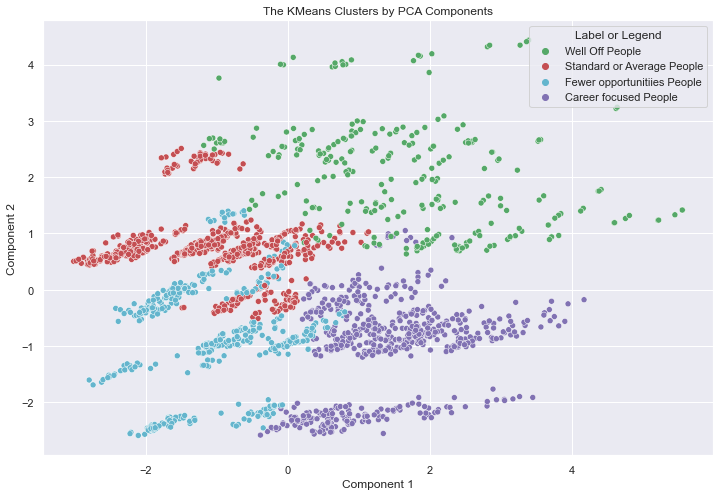

In [221]:
x_axis = df_seg_KMeans_pca['Component 1']
y_axis = df_seg_KMeans_pca['Component 2']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_KMeans_pca['Label or Legend'], palette = ['g', 'r', 'c', 'm'] )
plt.title('The KMeans Clusters by PCA Components')

**DATA EXPORT**

In [228]:
pickle.dump(myscaler, open('scaler.pickle', 'wb'))

In [229]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [230]:
pickle.dump(my_KMeans_pca, open('my_Kmeans_pca.pickle', 'wb'))